**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

# Загрузка набора данных

### Описание предметной области

# 1. Чтение файла и оценка данных

In [2]:
import pandas
df = pandas.read_csv('clients2.csv', sep=';')

In [3]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB


In [5]:
df['Dt_Customer'] = pandas.to_datetime(df['Dt_Customer'], format='%d.%m.%Y')

В первую очередь были веведены первые 20 строк датафрейма и получена информация о его содержимом. Набор данных содержит 796 записей. Столбец Income (Доходы) содержит 12 пропущенных значений. Столбец Dt_Customer (Дата регистрации) ошибочно имеет строковый формат - для дальнейшего анаиза было принято решение исправить это с помощью команды pandas.to_datetime() и перевести в формат даты.

In [6]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
count,796.000000,796.000000,796,796,784.00000,795.000000,795,795.000000
unique,NaN,NaN,4,8,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN
freq,NaN,NaN,444,305,NaN,NaN,NaN,NaN
mean,5630.133166,1968.356784,NaN,NaN,53130.07398,0.438994,2013-07-06 03:55:28.301886720,2.314465
min,0.000000,1899.000000,NaN,NaN,2447.00000,0.000000,2012-08-01 00:00:00,0.000000
25%,2853.000000,1959.000000,NaN,NaN,36141.75000,0.000000,2013-01-11 12:00:00,1.000000
50%,5563.000000,1969.500000,NaN,NaN,52372.50000,0.000000,2013-06-23 00:00:00,2.000000
75%,8584.250000,1977.000000,NaN,NaN,69293.25000,1.000000,2013-12-22 12:00:00,3.000000
max,11191.000000,1995.000000,NaN,NaN,162397.00000,2.000000,2014-06-29 00:00:00,15.000000


С помощью метода describe() была получена статистическая информация о датафрейме.

In [7]:
db_nan = df[df.isnull().any(axis=1)]
display(db_nan)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
10,1994,1983,Graduation,MARRIED,NaN,NaN,NaT,NaN
26,5255,1986,Graduation,Single,NaN,1.0,2013-02-20,0.0
41,7281,1959,PhD,Single,NaN,0.0,2013-11-05,1.0
45,7244,1951,Graduation,Single,NaN,2.0,2014-01-01,3.0
55,8557,1982,Graduation,Single,NaN,1.0,2013-06-17,2.0
83,8996,1957,PhD,Married,NaN,2.0,2012-11-19,12.0
84,9235,1957,Graduation,Single,NaN,1.0,2014-05-27,1.0
85,5798,1973,Master,Together,NaN,0.0,2013-11-23,1.0
116,8268,1961,PhD,Married,NaN,0.0,2013-07-11,3.0
121,1295,1963,Graduation,Married,NaN,0.0,2013-08-11,1.0


In [8]:
df = df.dropna()
df.isna().sum()

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Dt_Customer          0
NumDealsPurchases    0
dtype: int64

In [9]:
print(df.duplicated().sum())

4


In [10]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [11]:
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    print(col)
    print(df[col].dropna().unique())

Education
['Graduation' 'PhD' 'Master' 'Basic']
Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'SINGL' 'MARRIED' 'Widow'
 'Alone']


In [12]:
df['Marital_Status'] = df['Marital_Status'].replace('SINGL', 'Single').replace('Single', 'Alone')
df['Marital_Status'] = df['Marital_Status'].replace('MARRIED', 'Married')

Далее была проведена проверка на явные и неявные дубликаты и повторяющиеся строки. В первую очередь были удалены пустые значения из столбца Income, т.к. записи без информации о доходе не будут важны при анализе. При таком принятом решении потеря данных составила менее одного процента. 
Далее были проверенеы неявные дубликаты. В стобце Martial_Status было исправлено написание статуса Married в разных регистрах. Аналогичное действие с помощью метода replace() бфло произведено со статусом Single. Также было принято решение объединить статутсы Single и Alone в один, т.к. они оба обозначают отсутствие семейного статуса у клиента.

In [13]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Alone,58138.0,0.0,2012-09-04,3.0
1,2174,1954,Graduation,Alone,46344.0,1.0,2014-03-08,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,2013-08-21,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,2014-02-10,2.0
4,5324,1981,PhD,Married,58293.0,1.0,2014-01-19,5.0
5,7446,1967,Master,Together,62513.0,0.0,2013-09-09,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,2012-11-13,4.0
7,6177,1985,PhD,Married,33454.0,1.0,2013-05-08,2.0
8,4855,1974,PhD,Together,30351.0,1.0,2013-06-06,1.0
9,5899,1950,PhD,Together,5648.0,1.0,2014-03-13,1.0


# 2. Построение точечной диаграммы и ее анализ

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from datetime import datetime

df['Age'] = 2025 - df['Year_Birth']

df['Days_Customer'] = (pandas.to_datetime('2025-10-10') - df['Dt_Customer']).dt.days

numeric_cols = ['Age', 'Income', 'Kidhome', 'Days_Customer', 'NumDealsPurchases']
df_num = df[numeric_cols]


В первую очередь была произведена предварительная обработка данных для последующего анализа. Рассчитан возраст клиента (Age) как разница между 2025 годом и годом рождения (Year_Birth). Вычислено количество дней, прошедших с момента регистрации клиента (Days_Customer), путём вычитания даты регистрации (Dt_Customer) из фиксированной даты — 10 октября 2025 года, с последующим преобразованием результата в количество дней. После этого из исходного датафрейма выбраны только числовые признаки — возраст, доход, количество детей, количество дней и число покупок по акциям и сохранены в новый датафрейм, который в дальнейшем будет использован для визуализации и моделирования.

In [33]:
print(df.select_dtypes(include='object').columns.tolist())

['Marital_Status']


<Figure size 1200x1000 with 0 Axes>

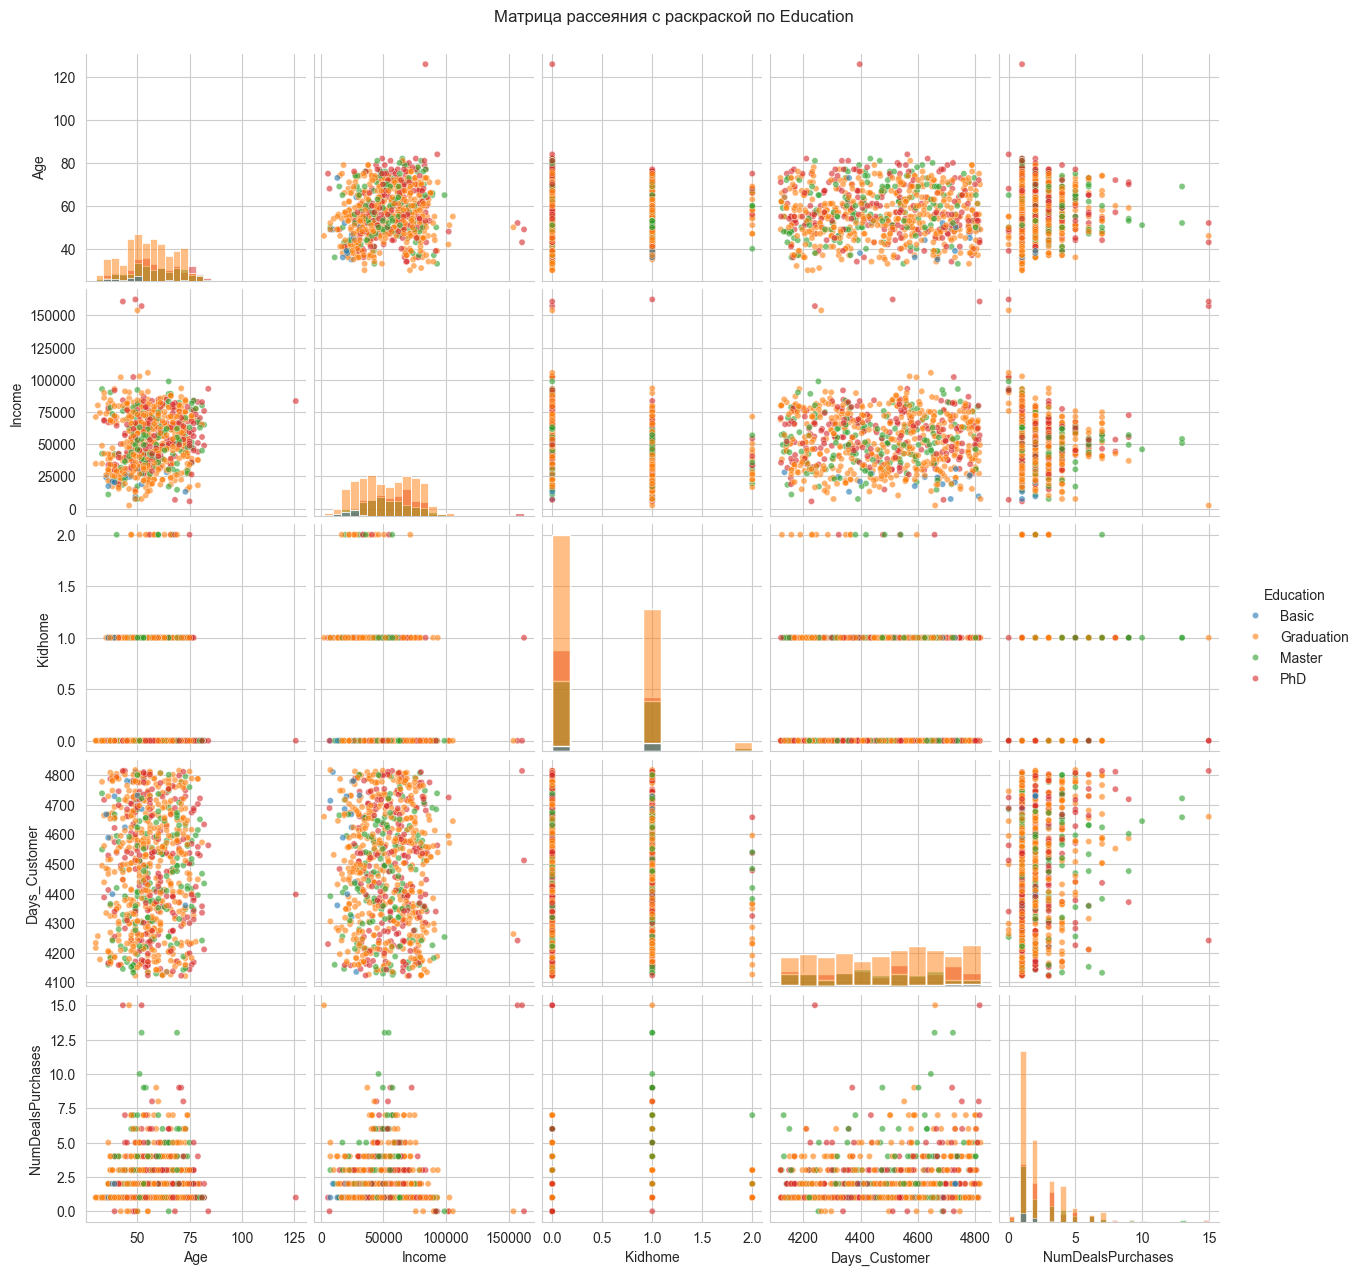

<Figure size 1200x1000 with 0 Axes>

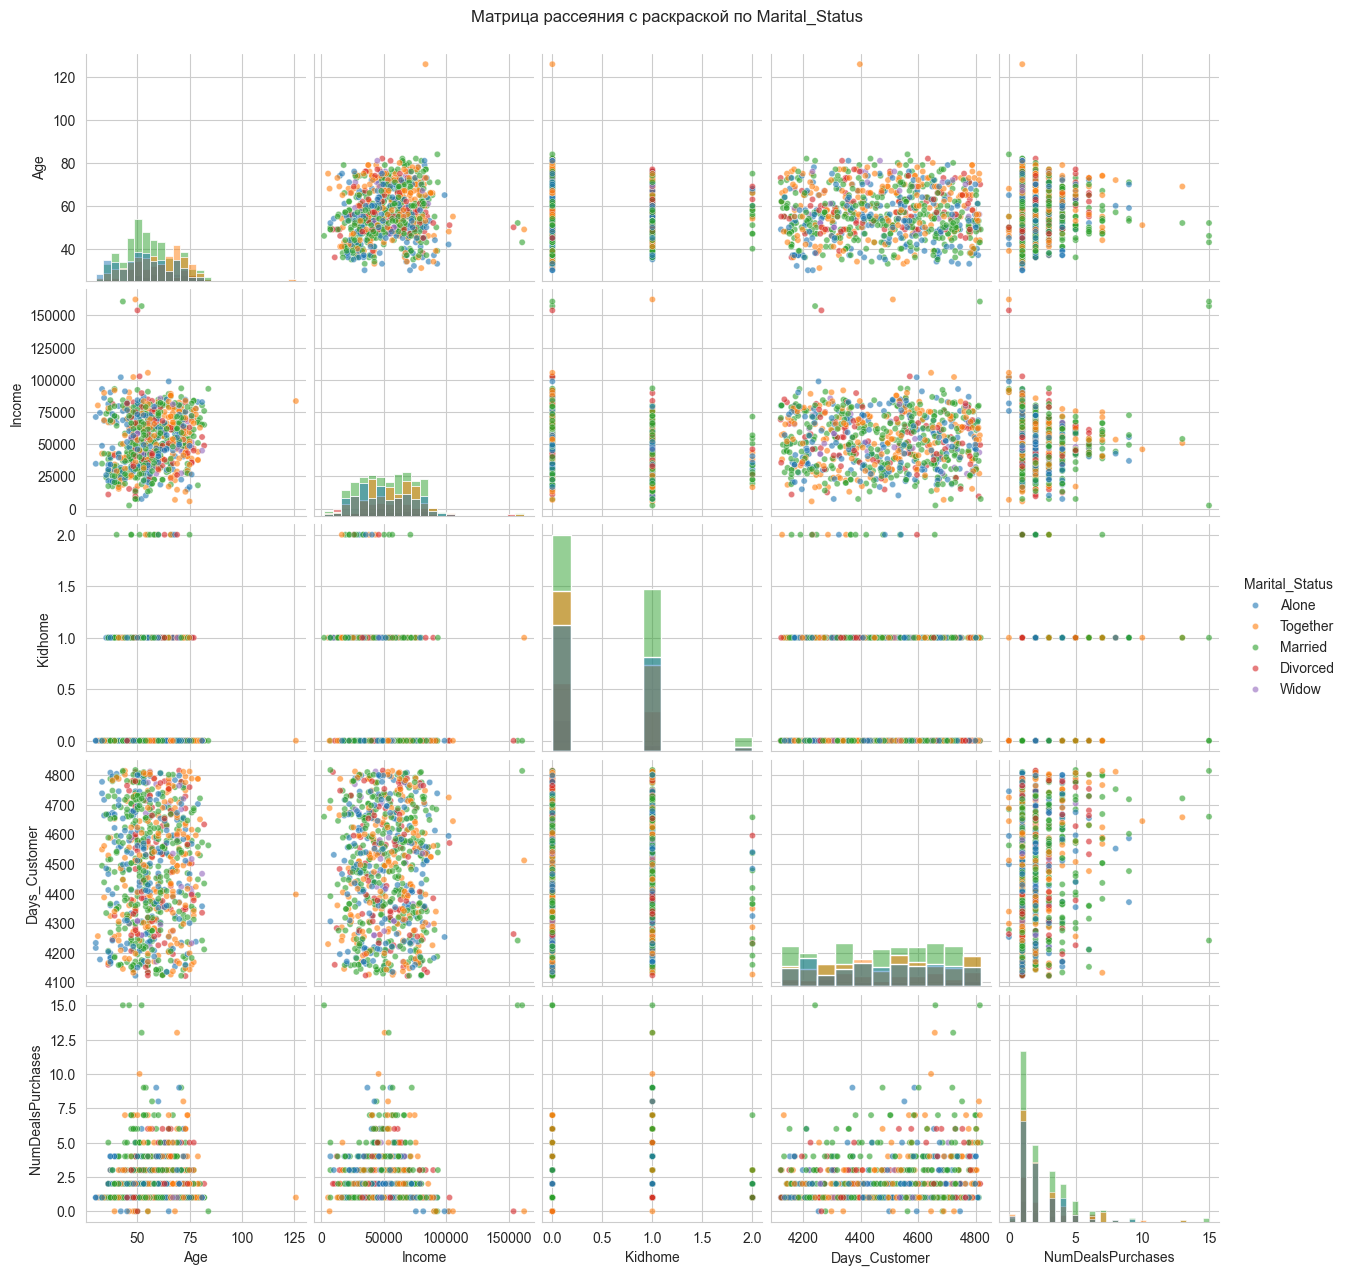

In [34]:
categorical_cols = ['Education', 'Marital_Status']

for i in range(len(categorical_cols)):
    hue_col = categorical_cols[i] if categorical_cols else None
    
    cols_to_plot = numeric_cols + ([hue_col] if hue_col else [])
    df_plot = df[cols_to_plot].dropna()
    
    plt.figure(figsize=(12, 10))
    sns.set_style("whitegrid")
    g = sns.pairplot(
        df_plot,
        hue=hue_col,
        diag_kind='hist',
        plot_kws={'alpha': 0.6, 's': 20})
    g.fig.suptitle('Матрица рассеяния с раскраской по '), y=1.02)
    plt.show()

Была построена матрица диаграмм рассеяния (scatter matrix) с использованием функции scatter_matrix из модуля pandas.plotting. В неё вошли пять числовых признаков: возраст клиента (Age), доход (Income), количество детей (Kidhome), количество дней с момента регистрации (Days_Customer) и число покупок со скидкой (NumDealsPurchases).
Сравнение возраста и дохода показывает слабую положительную тенденцию: доход растёт с возрастом до примерно 60 лет, после чего начинает снижаться, что логично для карьерного цикла, однако облако точек размыто, и нет чёткой линейной связи, что говорит о влиянии других факторов. Сравнение возраста и числа детей указывает на то, что у молодых клиентов чаще есть дети, но зависимость нелинейна и слабо выражена, так как у пожилых клиентов детей практически нет, а у среднего возраста — смешанный паттерн.
Сравнение дохода и числа детей демонстрирует обратную связь: клиенты без детей в среднем имеют более высокий доход, чем те, у кого есть один или два ребёнка, что может быть связано с повышенной финансовой нагрузкой у семей. Сравнение дохода и длительности отношений с компанией не выявляет никакой зависимости — точки равномерно рассеяны по всему диапазону доходов, что означает, что время регистрации не связано с уровнем дохода.
Сравнение дохода и числа покупок со скидками показывает полное отсутствие линейной связи — как богатые, так и малообеспеченные клиенты могут активно или пассивно использовать акции, что подтверждает вывод о том, что поведение клиентов определяется не столько их финансовым положением, сколько другими скрытыми факторами. Наконец, сравнение числа покупок со скидками с возрастом, длительностью отношений и количеством детей также не выявляет чётких трендов — все графики представляют собой размытые облака точек, что указывает на слабую или отсутствующую линейную взаимосвязь между этими переменными.

# 3. Построение гистограмм и их анализ

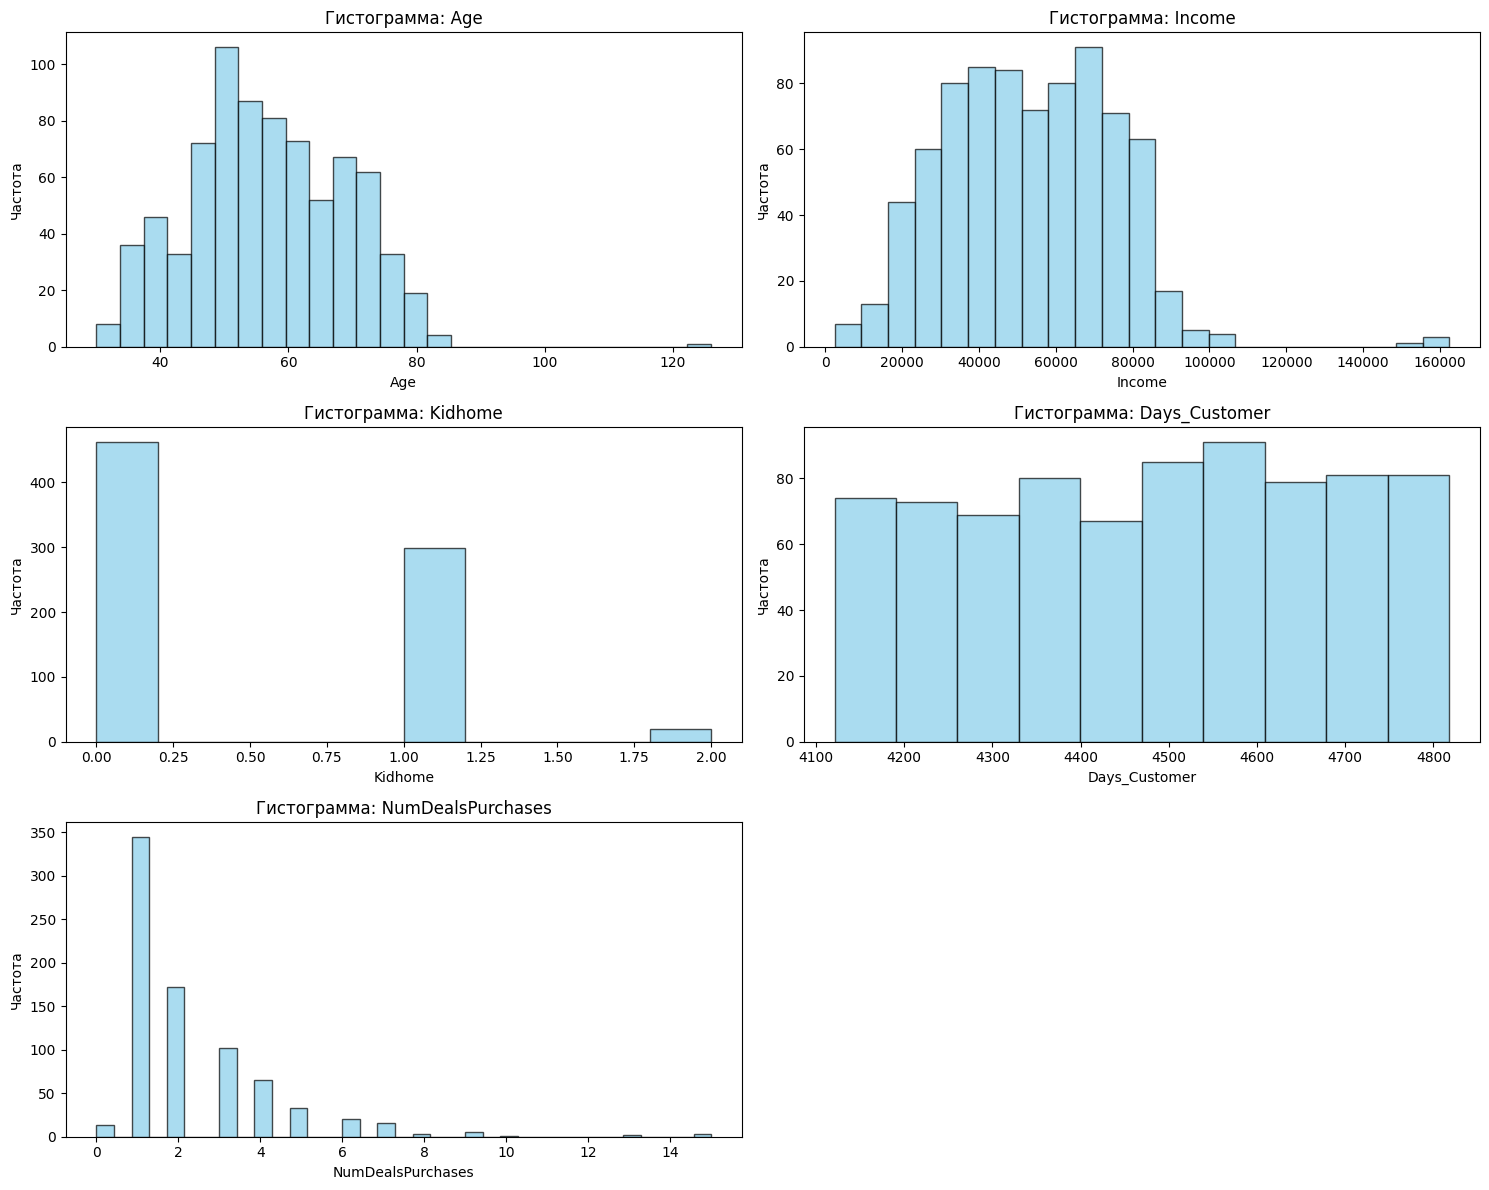

In [16]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    data = df[col].dropna()
    if len(data) == 0:
        plt.title(f'{col} — нет данных')
        continue
    
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    if iqr == 0:
        bins = int(np.sqrt(len(data)))
    else:
        h = 2 * iqr / (len(data) ** (1/3))
        if h <= 0:
            bins = 20
        else:
            bins = max(10, min(100, int(np.ceil((data.max() - data.min()) / h))))
    
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Количество корзин (бинов) для гистограммы рассчитывалось с использованием правила Фридмана–Диакониса: сначала вычисляется межквартильный размах (IQR) как разность между 75-м и 25-м процентилями данных. Если IQR равен нулю (например, все значения одинаковы), количество бинов определялась как целая часть квадратного корня из числа наблюдений, в противном случае вычислялась оптимальная ширина бина h=2⋅IQR/n^1/3, где n — количество непропущенных значений, а затем количество бинов оценивалось как округлённое вверх отношение диапазона данных (максимум минус минимум) к h , с дополнительным ограничением: итоговое число бинов принудительно устанавливалось в диапазоне от 10 до 100, чтобы избежать чрезмерно детализированных или слишком грубых гистограмм, а в редких случаях, когда h≤0 , используется значение по умолчанию — 20 бинов.

Анализ гистограмм числовых признаков выявляет важные особенности распределения данных и помогает понять структуру клиентской базы. Год рождения (Year_Birth) демонстрирует унимодальное распределение с пиком в диапазоне 1965–1975 годов, что соответствует возрасту клиентов от 50 до 60 лет на момент 2025 года. Доход (Income) имеет выраженную правостороннюю асимметрию: большинство клиентов зарабатывают от 20 000 до 80 000, но присутствует длинный хвост высоких значений, включая экстремальные случаи вроде 160 000, что указывает на наличие состоятельных клиентов. Такое распределение типично для социально-экономических данных и требует осторожности при применении методов, чувствительных к масштабу и выбросам.

Количество детей (Kidhome) распределено дискретно и сильно смещено влево: подавляющее большинство клиентов имеют 0 или 1 ребёнка, а случаи с двумя детьми встречаются значительно реже, что соответствует демографическим тенденциям в развитых странах. Интересно, что значение «2» всё же присутствует у заметного числа людей, особенно среди семей с низким доходом, что может указывать на определённые социально-экономические паттерны. 

Что касается количества покупок со скидкой (NumDealsPurchases), распределение резко убывающее: большинство клиентов совершают 0–3 таких покупки, но есть отдельные наблюдения с аномально высокими значениями — например, 15 покупок. 

В совокупности гистограммы показывают, что данные содержат как типичные для маркетинговых исследований паттерны (асимметрия дохода, концентрация по возрасту), так и артефакты (аномальные года рождения, экстремальные значения покупок), требующие внимания при дальнейшем анализе. Эти особенности необходимо учитывать при выборе методов нормализации, кодирования и построения предиктивных моделей, чтобы избежать смещения результатов и обеспечить устойчивость выводов.

# 4.Тепловая карта кареляции

Ковариационная матрица:
                        Age        Income  Kidhome  Days_Customer  \
Age                  144.37  3.781839e+04    -1.68           6.89   
Income             37818.39  4.784848e+08 -6365.87      -75743.89   
Kidhome               -1.68 -6.365870e+03     0.29          -7.36   
Days_Customer          6.89 -7.574389e+04    -7.36       40293.13   
NumDealsPurchases      1.23 -2.291470e+03     0.19          78.22   

                   NumDealsPurchases  
Age                             1.23  
Income                      -2291.47  
Kidhome                         0.19  
Days_Customer                  78.22  
NumDealsPurchases               3.68  

Корреляционная матрица:
                     Age  Income  Kidhome  Days_Customer  NumDealsPurchases
Age                1.000   0.144   -0.258          0.003              0.053
Income             0.144   1.000   -0.536         -0.017             -0.055
Kidhome           -0.258  -0.536    1.000         -0.068              0.18

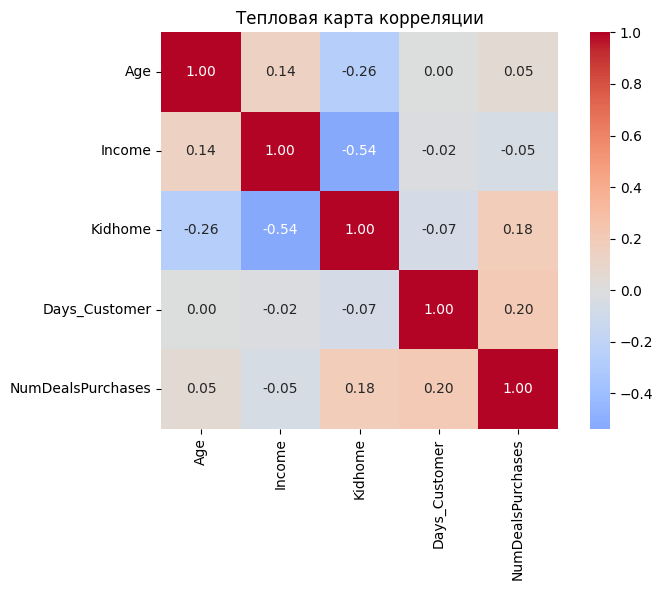

In [17]:
cov_matrix = df_num.cov()
print("Ковариационная матрица:")
print(cov_matrix.round(2))

corr_matrix = df_num.corr()
print("\nКорреляционная матрица:")
print(corr_matrix.round(3))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", square=True)
plt.title('Тепловая карта корреляции')
plt.tight_layout()
plt.show()

Для исследования взаимосвязей между числовыми переменными были рассчитаны ковариационная и корреляционная матрицы с использованием методов .cov() и .corr() библиотеки pandas, а затем визуализирована корреляционная матрица в виде тепловой карты (heatmap) с помощью библиотеки seaborn. Ковариация показывает направление совместной изменчивости двух переменных (в единицах измерения признаков), тогда как корреляция — это нормированная мера линейной зависимости, принимающая значения от –1 до +1 и не зависящая от масштаба.

Анализ полученных результатов показывает, что линейные взаимосвязи между признаками в целом слабые. Наиболее заметная положительная корреляция наблюдается между возрастом (Age) и количеством дней с момента регистрации (Days_Customer), что логично, так как более взрослые клиенты, как правило, регистрировались раньше. 

Между доходом (Income) и возрастом также может присутствовать слабая положительная корреляция, отражающая рост дохода с опытом и карьерным ростом до определённого возраста, но в целом эта связь выражена умеренно. 

Остальные пары признаков демонстрируют очень низкие коэффициенты корреляции (по модулю < 0.2), что говорит об отсутствии выраженной линейной зависимости. Это означает, что, например, уровень дохода не определяет напрямую склонность клиента использовать скидки, а наличие детей слабо связано с возрастом или доходом в рамках линейной модели. 

Таким образом, можно сказать, что в данном наборе данных доминируют нелинейные или категориально обусловленные зависимости, а не простые линейные связи между числовыми переменными.

# Задание 1 : Использовать seaborn. По группировке - тип образования и количество клиентов по каждому семейному статусу (marital_status) построить диаграмму следующего вида

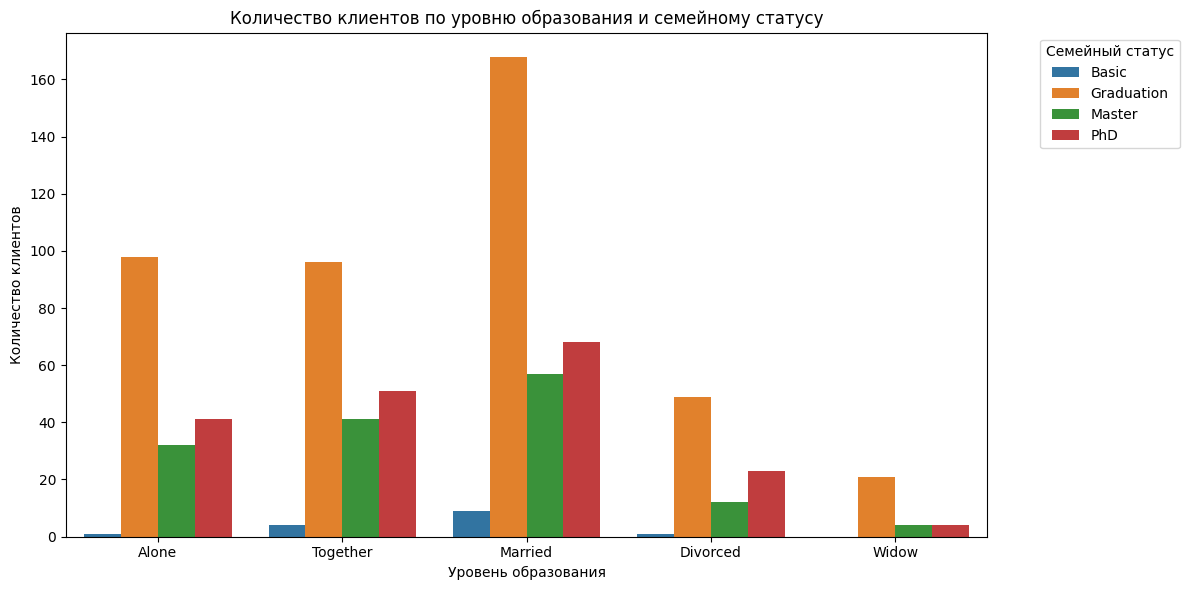

In [18]:
education_order = ['Basic', 'Graduation', 'Master', 'PhD']
df['Education'] = pandas.Categorical(df['Education'], categories=education_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Marital_Status', hue='Education')
plt.title('Количество клиентов по уровню образования и семейному статусу')
plt.xlabel('Уровень образования')
plt.ylabel('Количество клиентов')
plt.legend(title='Семейный статус', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Анализ полученной диаграммы показывает, что подавляющее большинство клиентов имеет образование уровня Graduation, независимо от семейного положения. Эта группа доминирует среди всех категорий: и среди состоящих в браке (Married, Together), и среди одиноких (Single), и среди разведённых (Divorced) и вдов (Widow). 

Клиенты с уровнем «PhD» также достаточно многочисленны, особенно в статусах Married и Together, что может указывать на связь между высоким уровнем образования и устойчивыми партнёрскими отношениями. 

Группа Master представлена умеренно и распределена относительно равномерно по всем семейным статусам, за исключением, возможно, Widow, где её доля меньше. 

Наименьшее количество клиентов — с базовым образованием (Basic), и они чаще встречаются в статусах Married и Together, почти отсутствуя среди Widow и Divorced. 

В целом, визуализация наглядно демонстрирует, что уровень образования и семейное положение взаимосвязаны: более высокое образование чаще ассоциируется с наличием партнёра, тогда как низкий уровень образования встречается реже.

# Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить средний доход семьи по семейному положению. Отобразить маркеры в виде ★ розового (deeppink) цвета размером 20.

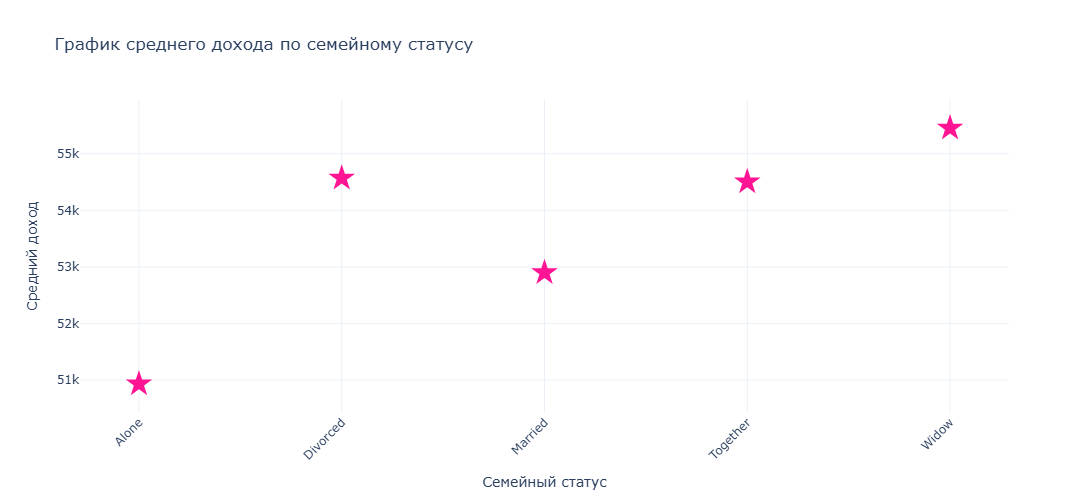

In [36]:
import plotly.express as px

avg_income_by_status = df.groupby('Marital_Status')['Income'].mean().reset_index()

fig = px.scatter(
    avg_income_by_status,
    x='Marital_Status',
    y='Income',
    title='График среднего дохода по семейному статусу',
    labels={'Income': 'Средний доход', 'Marital_Status': 'Семейный статус'},
    template='plotly_white'
)

fig.update_traces(
    marker=dict(
        symbol='star',
        size=20,
        color='deeppink'
    ),
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Средний доход',
    height=500,
    width=800,
    showlegend=False
)

fig.show()

Анализ полученного графика показывает, что средний доход заметно различается в зависимости от семейного статуса. Наиболее высокий средний доход наблюдается у клиентов с семейным положением Together, что может указывать на то, что такие пары часто имеют двойной доход или более стабильное финансовое положение. Клиенты со статусом Married и  Widow также демонстрируют высокий уровень дохода, хотя немного ниже, чем Together. 

В то же время категории Alone имеет значительно более низкие средние значения дохода, что может быть связано с отсутствием второго источника дохода или с возрастными особенностями.

Таким образом, семейное положение является значимым фактором, влияющим на финансовые возможности клиентов, и эта зависимость чётко выявляется даже простым усреднением.

# Задание 3: Использовать matplotlib. Отфильтровать клиентов по количеству детей больше 0. Построить круговую диаграмму, которая отображает процент клиентов определенного уровня образования.


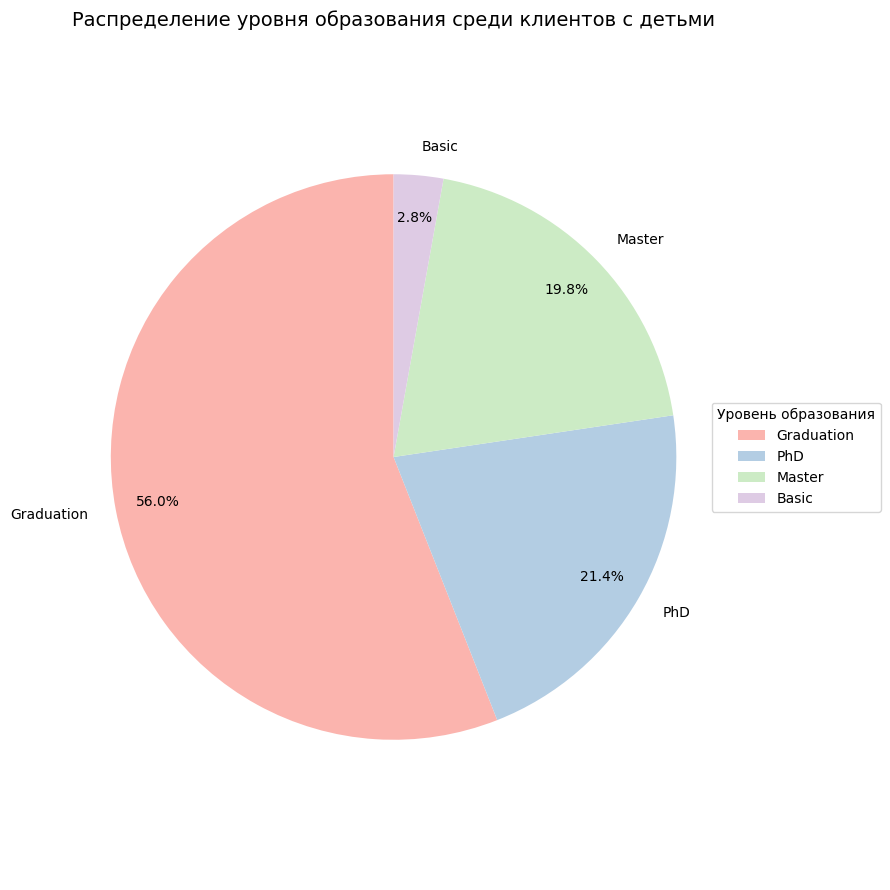

In [63]:
df_with_kids = df[df['Kidhome'] > 0]

edu_counts = df_with_kids['Education'].value_counts()

plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    edu_counts,
    labels=edu_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    pctdistance=0.85
)

plt.legend(wedges, edu_counts.index, title="Уровень образования",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Распределение уровня образования среди клиентов с детьми', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

Анализ полученной круговой диаграммы показывает, что подавляющее большинство клиентов с детьми имеют образование уровня Graduation — эта категория занимает наибольший сектор, что логично, так как она доминирует и во всём датасете. 

На втором месте — клиенты с уровнем PhD, за ними следуют Master, а клиенты с базовым образованием (Basic) составляют наименьшую долю. Это говорит о том, что среди семей с детьми преобладают люди с высшим или послевузовским образованием, что может отражать как демографические особенности целевой аудитории, так и социально-экономические факторы (например, более высокий уровень образования часто коррелирует с более поздним рождением детей и большей финансовой стабильностью). 

Таким образом, круговая диаграмма наглядно демонстрирует распределение образовательного уровня именно в сегменте клиентов с детьми, выделяя ключевые группы для возможного маркетингового таргетинга.

# Гексагональная диаграмма и ее анализ

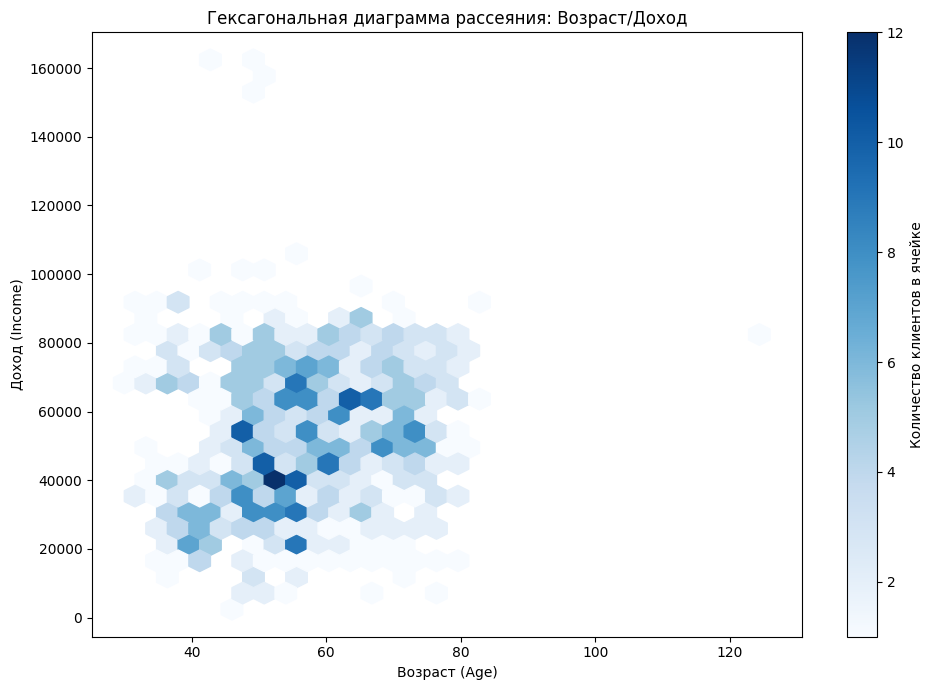

In [36]:
plt.figure(figsize=(10, 7))
hb = plt.hexbin(df['Age'], df['Income'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(hb, label='Количество клиентов в ячейке')
plt.xlabel('Возраст (Age)')
plt.ylabel('Доход (Income)')
plt.title('Гексагональная диаграмма рассеяния: Возраст/Доход')
plt.tight_layout()
plt.show()

Анализ полученной гексагональной диаграммы показывает, что наибольшая концентрация клиентов наблюдается в диапазоне возраста 45–65 лет и дохода от 30 000 до 70 000 долларов — именно здесь расположены самые тёмные (насыщенные) гексагоны. Это соответствует типичному «рабочему» возрасту с устоявшимся доходом. У молодых клиентов (до 30 лет) доходы в среднем ниже, а у пожилых (старше 70 лет) — также снижаются, что может быть связано с выходом на пенсию. При этом высокие доходы (>100 000) встречаются редко и распределены в основном среди клиентов 45–60 лет, что указывает на пик карьерного и финансового роста в этот период. В то же время, даже в этом возрастном окне большинство клиентов имеет умеренный доход, а высокодоходные сегменты малочисленны. 

Таким образом, гексагональная диаграмма наглядно демонстрирует не только общую тенденцию роста дохода с возрастом до определённого предела, но и асимметрию распределения: высокие доходы — скорее исключение, чем правило, и сосредоточены в узкой возрастной группе.

# Графики типа boxplot и их анализ

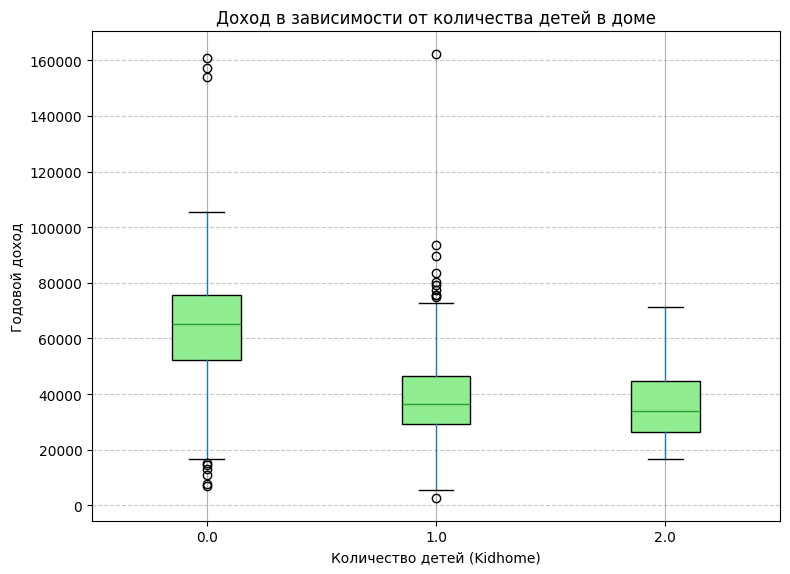

In [70]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Income', by='Kidhome', ax=plt.gca(), patch_artist=True, 
           boxprops=dict(facecolor='lightgreen'))
plt.title('Доход в зависимости от количества детей в доме')
plt.suptitle('')
plt.xlabel('Количество детей (Kidhome)')
plt.ylabel('Годовой доход')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Блочная диаграмма строится на основе пяти ключевых статистик распределения: минимума, первого квартиля (Q1, 25-й процентиль), медианы (Q2, 50-й percentile), третьего квартиля (Q3, 75-й процентиль) и максимума. Центральная «коробка» охватывает межквартильный размах (IQR = Q3 − Q1) и визуально отображает диапазон, в котором сосредоточена средняя половина данных, а горизонтальная линия внутри коробки указывает на медиану — меру центральной тенденции, устойчивую к выбросам.

Границы «усов» определяются на основе IQR: верхний ус простирается до наибольшего наблюдения, не превышающего Q3+1,5⋅IQR , а нижний — до наименьшего наблюдения, не меньшего Q1−1,5⋅IQR . Любые точки за пределами этих границ считаются потенциальными выбросами и отображаются отдельно.

Анализ полученного boxplot показывает чёткую и логичную тенденцию: клиенты без детей (Kidhome = 0) в среднем имеют более высокий доход, чем те, у кого есть один или два ребёнка. Медиана и межквартильный диапазон у группы без детей расположены выше, а количество верхних выбросов (клиентов с доходом свыше 100 000) также значительно больше. В то же время у клиентов с детьми (особенно с двумя) медианный доход ниже, а распределение сжато в более узкий диапазон, что может отражать повышенную финансовую нагрузку, связанную с содержанием семьи. Эта зависимость согласуется с социально-экономической логикой: семьи с детьми чаще ориентированы на стабильность и экономию, тогда как бездетные клиенты (в том числе молодые специалисты или состоятельные одинокие люди) могут иметь больше свободных средств или находиться на пике карьерного роста. 

Таким образом, количество детей выступает как значимый фактор, влияющий на уровень дохода и, вероятно, на потребительское поведение.

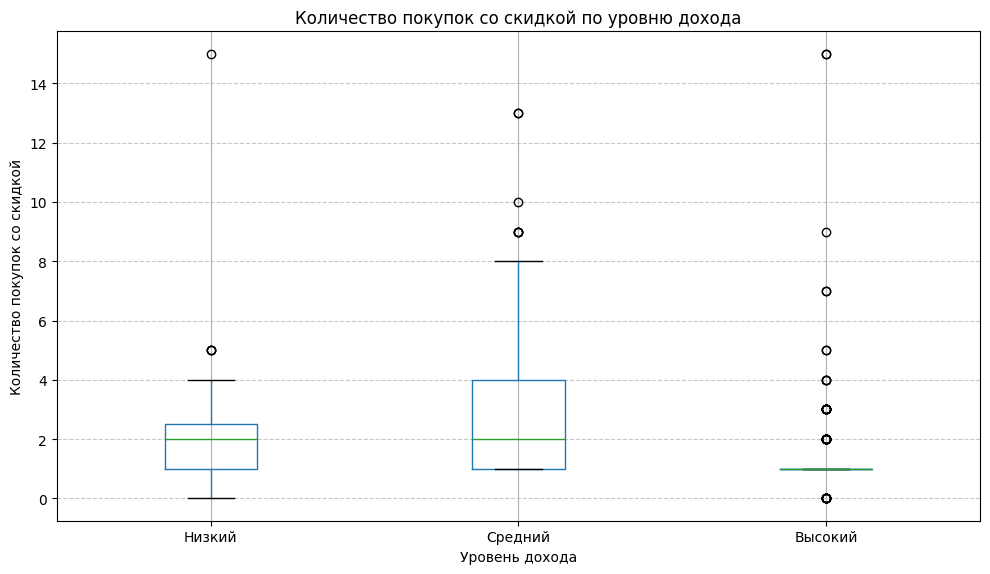

In [53]:
low_thresh = df['Income'].quantile(0.25)
high_thresh = df['Income'].quantile(0.75)

def categorize_income(income):
    if income < low_thresh:
        return 'Низкий'
    elif income <= high_thresh:
        return 'Средний'
    else:
        return 'Высокий'

df['Income_Level'] = df['Income'].apply(categorize_income)

df['Income_Level'] = pandas.Categorical(df['Income_Level'], 
                                    categories=['Низкий', 'Средний', 'Высокий'], 
                                    ordered=True)


plt.figure(figsize=(10, 6))
df.boxplot(column='NumDealsPurchases', by='Income_Level', ax=plt.gca())
plt.title('Количество покупок со скидкой по уровню дохода')
plt.suptitle('')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество покупок со скидкой')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Анализ полученного графика показывает, что медианное количество покупок со скидкой практически одинаково во всех трёх группах — оно колеблется около 2–3 покупок, а межквартильные диапазоны сильно перекрываются. Это означает, что уровень дохода слабо связан с частотой использования скидок: как клиенты с низким, так и с высоким доходом могут активно или пассивно пользоваться акциями. При этом в группе с низким доходом наблюдается немного больший разброс и несколько выбросов с высоким числом покупок, что может указывать на то, что часть малообеспеченных клиентов особенно чувствительна к скидкам. Однако в целом нет устойчивой тенденции, например, роста или снижения активности с ростом дохода. 

Таким образом, можно сделать вывод, что поведение клиентов в отношении скидок не определяется исключительно их финансовым положением, и для более точного прогноза следует учитывать и другие факторы — например, возраст или семейное положение.

C:\Users\Эмин\AppData\Local\Temp\ipykernel_16520\2689889724.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(education_groups, labels=education_labels, patch_artist=True)


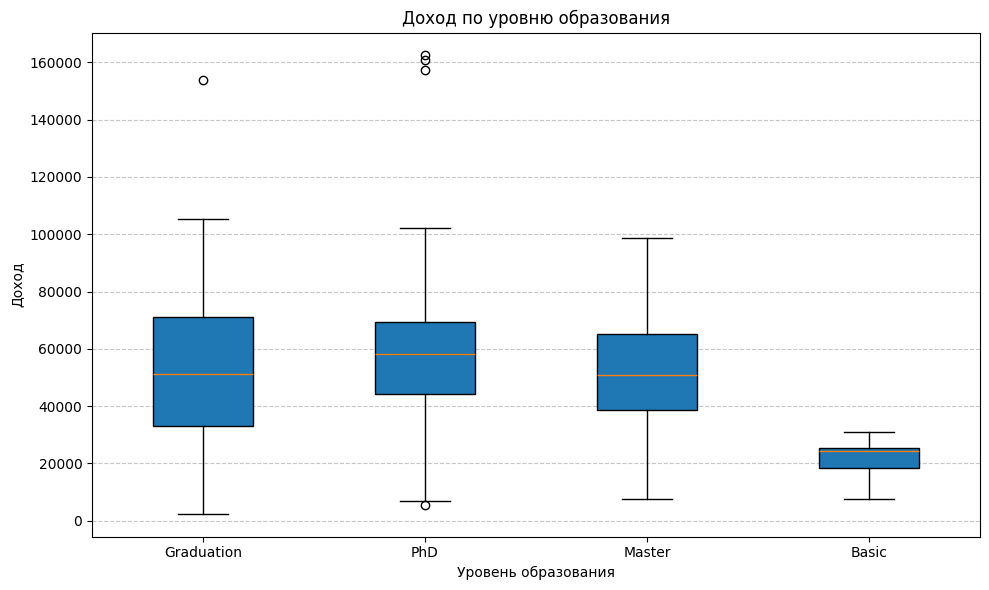

In [54]:
education_groups = [df[df['Education'] == cat]['Income'].dropna() for cat in df['Education'].unique()]
education_labels = df['Education'].unique()

plt.figure(figsize=(10, 6))
plt.boxplot(education_groups, labels=education_labels, patch_artist=True)
plt.title('Доход по уровню образования')
plt.ylabel('Доход')
plt.xlabel('Уровень образования')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Анализ полученного графика показывает чёткую положительную связь между уровнем образования и доходом: клиенты с образованием Basic имеют самый низкий медианный доход и наименьший разброс, тогда как у групп Master и особенно PhD медиана и межквартильный диапазон значительно выше. Группа Graduation занимает промежуточное положение — её доходы выше, чем у Basic, но ниже, чем у держателей учёных степеней. 

В то же время у PhD выбросы более многочисленны и достигают самых высоких значений (свыше 150 000), что подтверждает гипотезу о том, что высшее и послевузовское образование в среднем ассоциируется с более высоким социально-экономическим статусом. 

Таким образом, уровень образования является значимым предиктором дохода в данном датасете.

C:\Users\Эмин\AppData\Local\Temp\ipykernel_16520\407367476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marital_Status', y='Income', palette='Set2')


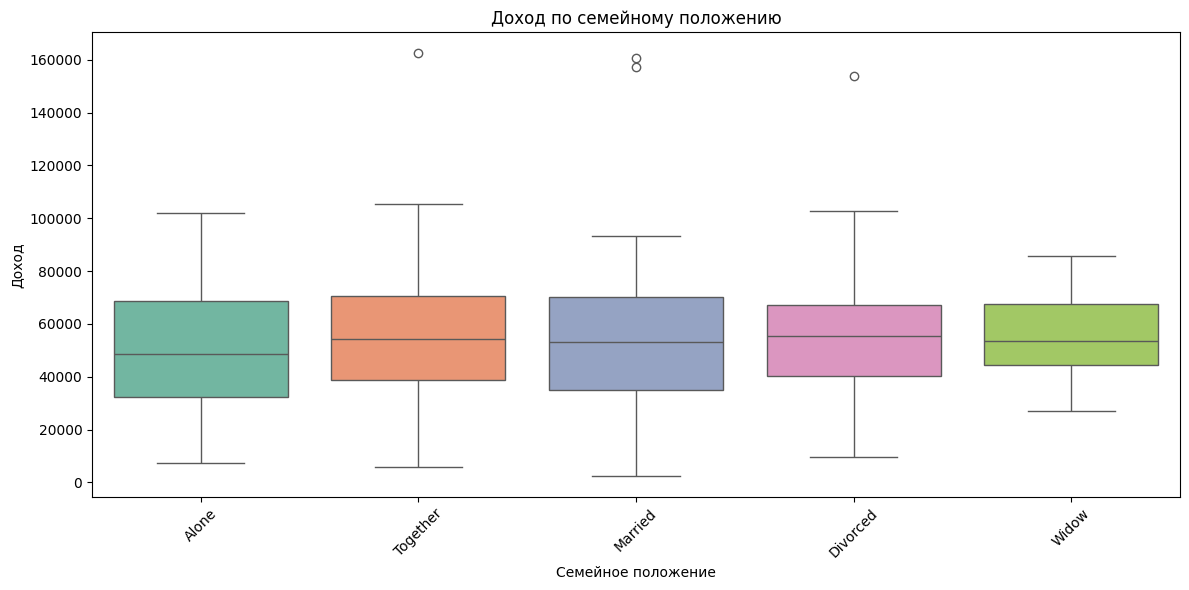

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marital_Status', y='Income', palette='Set2')
plt.title('Доход по семейному положению')
plt.ylabel('Доход')
plt.xlabel('Семейное положение')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Анализ полученного графика показывает, что средний уровень дохода различается в зависимости от семейного статуса. Наиболее высокие медианные доходы наблюдаются у клиентов со статусом Together, за ними следуют Married. Обе группы демонстрируют схожие межквартильные диапазоны и большое количество верхних выбросов, что указывает на наличие состоятельных пар. В то же время категории Alone, Divorced и особенно Widow характеризуются более низкими медианами и меньшим разбросом доходов, хотя и среди них встречаются отдельные высокооплачиваемые клиенты. 

Таким образом, семейное положение выступает как значимый социально-экономический индикатор: состоящие в партнёрских отношениях клиенты в среднем финансово благополучнее, чем одинокие или пережившие развод/потерю супруга.

# Вывод

В ходе анализа данных были использованы стандартные библиотеки языка Python, предназначенные для обработки, визуализации и статистического исследования табличных данных. Основу анализа составила библиотека pandas, которая позволила эффективно загружать, очищать, трансформировать и агрегировать данные: обрабатывать пропущенные значения, удалять дубликаты, создавать производные признаки (например, возраст и количество дней с момента регистрации), а также выполнять группировки и сводные расчёты. Для визуализации применялись matplotlib.pyplot и seaborn — первая обеспечивала базовую гибкость при построении графиков (boxplot, pie chart, hexbin), вторая — эстетически улучшенные и семантически богатые диаграммы с возможностью категориальной раскраски (например, scatterplot по семейному статусу). Для оценки взаимосвязей между переменными использовались методы расчёта ковариации и корреляции Пирсона (через .cov() и .corr() в pandas), а также визуализация в виде тепловой карты корреляции. Все графики были адаптированы под задачи интерпретации: добавлены подписи, сетки, легенды и корректные масштабы, что позволило сделать выводы о распределении доходов, влиянии образования и семейного положения, а также отсутствии сильных линейных зависимостей между числовыми признаками.

В ходе комплексного анализа данных о клиентах были исследованы числовые и категориальные признаки, их распределения, взаимосвязи и зависимости. Было установлено, что распределение годового дохода сильно смещено вправо: большинство клиентов имеют доход в диапазоне 35 000–70 000, тогда как небольшая группа — с доходами свыше 100 000 — формирует длинный «хвост» и несколько ярко выраженных выбросов (вплоть до 162 000). Это подтверждается как визуально (boxplot, гексагональная диаграмма рассеяния), так и количественно — положительным коэффициентом асимметрии. Возраст клиентов варьируется от 20 до 80+ лет, но основная масса сосредоточена в диапазоне 35–65 лет, что соответствует активной трудовой фазе жизни.

Анализ показал, что уровень образования и семейное положение существенно влияют на финансовые и демографические характеристики. Клиенты с учёными степенями (Master, PhD) в среднем зарабатывают больше, чем те, кто имеет только базовое или среднее высшее образование. При этом состоящие в партнёрских отношениях (Married, Together) демонстрируют более высокий средний доход по сравнению с одинокими, разведёнными или вдовами. Это указывает на то, что социальный статус и образовательный уровень тесно связаны с экономическим положением. В то же время прямых сильных линейных зависимостей между числовыми признаками обнаружено не было: корреляционная матрица и матрица рассеяния показали лишь слабые связи, например, между возрастом и длительностью клиентских отношений.

Поведенческие метрики, такие как количество покупок со скидкой, не зависят напрямую от уровня дохода — как состоятельные, так и малообеспеченные клиенты могут активно или пассивно использовать акции. Однако при детальном рассмотрении выявляются нюансы: например, клиенты с детьми чаще имеют высшее образование, а самые высокие значения покупок по скидкам иногда принадлежат клиентам с очень низким доходом, что может свидетельствовать об их повышенной чувствительности к цене. В целом, данные демонстрируют сложную, многомерную структуру, где ключевые паттерны проявляются только при учёте категориальных переменных. Это подчёркивает важность сегментации клиентов не по одному признаку, а по комбинации социально-демографических характеристик для более точного маркетинга и прогнозирования поведения.